# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

[Kami telah memberikan Anda beberapa komentar untuk menjadi panduan saat Anda menyelesaikan proyek ini. Tetapi, pastikan untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]

[Sebelum Anda menganalisis data Anda, jelaskan tujuan dari proyek ini dan langkah-langkah yang akan Anda lakukan.]

[Perlu diingat bahwa mempelajari, mengubah, dan menganalisis data adalah proses yang dilakukan secara berulang. Kembali ke langkah sebelumnya guna memperbaikinya untuk memungkinkan langkah selanjutnya adalah hal yang lumrah untuk dilakukan.]

**Tujuan Proyek**

Tujuan nya adalah untuk mencari tau faktor apa saja yang mempengaruhi penjualan mobil, adapun tahapan" untuk mencari tau
faktor apa saja yang membuat mobil laku terjual kita harus mengecek semua kolom pada data terlebih dahulu. Berikut merupakan 
langkah-langkah melakukan analisis proyek:
    1. Melakukan Pra Pemrosesan Data
    2. Mencari nilai yang Hilang pada setiap kolom
    3. Mengisi nilai NaN atau nilai yang hilang 
    4. Mempelajari outlier dan menghapus outlier
    5. Menentukan parameter inti
    6. Mengecek hasil dataframe tanpa outlier
    7. Mengecek korelasi atau tingkat hubungan antar kolom parameter apakah korelasi nya kuat/lemah atau positif/negatif
    8. Menarik kesimpulan secara keseluruhan

## Pra-pemrosesan

[Muat *library* yang Anda yakini akan dibutuhkan untuk proyek ini. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots


### Memuat Data

[Muat data proyek ini dan baca informasi umumnya.]

In [2]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')
df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
print(df.head())
df.info()


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Col

In [4]:
# tampilkan sampel data
#Check 10 Sample Data
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
35132,19995,2006.0,ford f350 super duty,like new,8.0,diesel,142645.0,automatic,truck,black,1.0,2019-01-06,14
39054,32000,2016.0,ford f150,like new,6.0,gas,60000.0,automatic,truck,white,1.0,2019-03-05,41
22645,15945,2009.0,cadillac escalade,excellent,8.0,gas,143638.0,automatic,SUV,red,1.0,2019-03-25,12
46032,3670,2005.0,jeep liberty,good,6.0,gas,161103.0,automatic,SUV,silver,1.0,2018-09-27,26
48160,19990,2006.0,gmc sierra 2500hd,good,8.0,gas,113648.0,automatic,truck,custom,1.0,2019-04-04,25
2049,30000,1969.0,chevrolet corvette,excellent,8.0,other,0.0,automatic,convertible,white,NaN,2018-08-01,20
1458,12950,2017.0,toyota corolla,excellent,4.0,gas,55528.0,automatic,sedan,silver,NaN,2019-04-06,69
39439,11995,2006.0,toyota tacoma,excellent,6.0,gas,156819.0,automatic,truck,white,NaN,2019-04-13,27
27045,16995,2012.0,gmc yukon,excellent,8.0,gas,NaN,automatic,SUV,black,1.0,2019-02-02,10
24394,950,2004.0,honda odyssey,fair,6.0,gas,291407.0,automatic,mini-van,red,NaN,2018-10-06,123


[Deskripsikan apa yang Anda lihat pada informasi umum dan sampel data yang ditampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?]

Kesimpulan Sementara
- Terdapat nilai yang hilang pada kolom `cylinders`, `is_4wd`
- Kolom model_year akan lebih rapi jika berbentuk interger
- Format kolom `date_posted` seharusnya menggunakan tipe data datetime64
- Kolom `condition` seharusnya diganti dari string menjadi skala numerik

In [5]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

[Apakah terdapat kolom dengan tipe data yang tidak sesuai?]

Kesimpulan Sementara
- Terdapat beberapa tipe data yang tidak sesuai
- kolom `model_year` seharusnya bertipe data interger
- kolom `cylinders` seharusnya bertipe data interger
- kolom `is_4wd` harusnya bertipe data interger
- kolom `odometer` seharusnya bertipe data interger


[Apakah terdapat nilai yang hilang di semua kolom atau hanya beberapa? Kolom apakah yang berisi paling banyak nilai yang hilang? Jelaskan secara singkat apa yang Anda amati dalam 1-2 kalimat.]

In [6]:
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

Terdapat beberapa data yang hilang pada beberapa kolom diantaranya pada kolom:
1. `model_year`
2. `cylinders`
3. `odometer`
4. `paint_color`
5. `is_4wd`

kolom yang terdapat paling banyak nilai yang hilang ada pada kolom `is_4wd` yaitu sebanyak 25953 nilai yang hilang

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Kesimpulan Sementara
-Terdapat nilai minimum yang tidak wajar pada kolom `price` yaitu 1.000000 sehingga perlu dianalisis 
-Pada dataset tidak terdapat data yang memiliki duplikat
-Pada kolom `transmission` dan `type` terdapat nilai yang memuat jenis `other` yang dapat menimbulkan anomali 
 sehingga perlu dianalisis lebih lanjut

### Kesimpulan dan Langkah-Langkah Selanjutnya

[Rumuskan kesimpulan Anda tentang data awal. Menurut Anda apa yang terlihat normal dan apa yang tidak?] 
[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini. Khususnya, Anda harus menyatakan dengan jelas bagian data mana yang harus ditangani agar lebih sesuai untuk analisis yang diperlukan.]

Terdapat beberapa data yang hilang pada beberapa kolom diantaranya pada kolom:
1. `model_year`
2. `cylinders`
3. `odometer`
4. `paint_color`
5. `is_4wd`

kolom yang terdapat paling banyak nilai yang hilang ada pada kolom `is_4wd` yaitu sebanyak 25953 nilai yang hilang

**Tipe Data**
- Terdapat beberapa tipe data yang tidak sesuai
- kolom `model_year` seharusnya bertipe data interger
- kolom `cylinders` seharusnya bertipe data interger
- kolom `is_4wd` harusnya bertipe data interger
- kolom `odometer` seharusnya bertipe data interger


**Penulisan**
- Akan lebih baik jika ada data hari dalam minggu, bulan, dan tahun iklan ditayangkan
- Akan lebih baik jika terdapat kolom umur kendaraan dalam tahun, jumlah odometer rata-rata atau jarak tempuh rata-rata kendaraan per tahun.


kita akan mengasumsikan bahwa nilai NaN bernilai False = 0 atau bukan 4_wd 

Berdasarkan data dari kolom `is_4wd' kita dapat mengetahui bahwa hanya
terdapat 2 jenis yaitu 4 wheel drive atau yang bukan 4 wheeldrive, sementara untuk jenis penggerak roda pada mobil hanya memiliki 2 jenis, yaitu 4 wheel drive dan 2 wheeldrive
oleh karena itu mari kita kategorikan yang termasuk dalam nilai NaN menjadi 2_wd atau bernilai false

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

[Pelajari nilai yang hilang untuk setiap kolom secara lebih detail dan putuskan apa yang harus dilakukan dengan nilai tersebut berdasarkan hipotesis.]

Langkah pertama adalah mengecek Kolom-kolom yang terdapat nilai yang Hilang

In [9]:
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

Langkah kedua adalah menghitung persentase dari data yang hilang tiap kolom dengan total data tiap kolom

In [10]:
for col in df.columns:
    missing = df[col].isnull().sum()
    total = df[col].shape[0]
    percent = missing/total * 100
    print(f" Pada Kolom {col} terdapat sebanyak {percent: .2f}% nilai yang hilang ")

 Pada Kolom price terdapat sebanyak  0.00% nilai yang hilang 
 Pada Kolom model_year terdapat sebanyak  7.02% nilai yang hilang 
 Pada Kolom model terdapat sebanyak  0.00% nilai yang hilang 
 Pada Kolom condition terdapat sebanyak  0.00% nilai yang hilang 
 Pada Kolom cylinders terdapat sebanyak  10.21% nilai yang hilang 
 Pada Kolom fuel terdapat sebanyak  0.00% nilai yang hilang 
 Pada Kolom odometer terdapat sebanyak  15.32% nilai yang hilang 
 Pada Kolom transmission terdapat sebanyak  0.00% nilai yang hilang 
 Pada Kolom type terdapat sebanyak  0.00% nilai yang hilang 
 Pada Kolom paint_color terdapat sebanyak  17.99% nilai yang hilang 
 Pada Kolom is_4wd terdapat sebanyak  50.37% nilai yang hilang 
 Pada Kolom date_posted terdapat sebanyak  0.00% nilai yang hilang 
 Pada Kolom days_listed terdapat sebanyak  0.00% nilai yang hilang 


**Kesimpulan Sementara**
- Persentase kolom model_year terdapat sebanyak 7.02% nilai yang hilang
- Persentase kolom cylinders terdapat sebanyak 10.21% nilai yang hilang
- Persentase kolom odometer terdapat sebanyak 15.32% nilai yang hilang
- Persentase kolom paint_color terdapat sebanyak 17.99% nilai yang hilang
- Persentase kolom is_4wd terdapat sebanyak 50.37% nilai yang hilang


**Mengisi nilai yang hilang pada kolom paint_color dengan nilai yang pertama muncul**

In [11]:
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [12]:
df['paint_color']= df['paint_color'].fillna('unknown')

**Mengubah nilai NaN pada kolom `is_4wd` menjadi nilai false atau 0**

In [13]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [14]:
df['is_4wd'].isna().sum()

0

In [15]:
group_by_model = df.groupby('model').agg({'model_year': 'median', 'cylinders':'median'})
group_by_model

,model_year,cylinders
model,,
acura tl,2007.0,6.0
bmw x5,2010.0,6.0
buick enclave,2012.0,6.0
cadillac escalade,2009.0,8.0
chevrolet camaro,2013.0,6.0
...,...,...
toyota sienna,2008.0,6.0
toyota tacoma,2010.0,6.0
toyota tundra,2009.0,8.0


**Mengubah nilai NaN pada kolom `model_year` dengan nilai yang pertama muncul

In [16]:
df1 = df.copy()
for model in df1['model'].unique():
    df1.loc[(df1['model'] == model) & (df1['model_year'].isna()), 'model_year'] = \
        group_by_model.loc[group_by_model.index == model,'model_year'][0]

In [17]:
df1['model_year'].isna().sum()

0

In [18]:
df1.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [19]:
for model in df1['model'].unique():
    df1.loc[(df1['model'] == model) & (df1['cylinders'].isna()), 'cylinders'] = \
        group_by_model.loc[group_by_model.index == model,'cylinders'][0]

In [20]:
df1.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [21]:
group_by_condition = df.groupby('condition').agg({'odometer':'median'})
group_by_condition

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [22]:
for condition in df1['condition'].unique():
    df1.loc[(df1['condition'] == condition) & (df1['odometer'].isna()), 'odometer'] = \
        group_by_condition.loc[group_by_condition.index == condition,'odometer'][0]

In [23]:
df1['condition'].isna().sum()

0

In [24]:
df1.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [25]:
#Sample data yang telah diatasi Nilai yang Hilang
df1.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


## Memperbaiki Tipe Data

[Karena data kurang lebih telah lengkap, maka perbaiki tipe datanya jika dibutuhkan.]

**Mengubah Tipe Data float menjadi boolean**

In [26]:
df1['is_4wd'] = df1['is_4wd'].astype(bool)

**Mengubah format kolom `['date_posted']` menjadi datetime**

In [27]:
df1['date_posted'] = pd.to_datetime(df1['date_posted'] , format='%Y-%m-%d')

**Mengubah kolom `['model_year']` ke  interger**

In [28]:
df1['model_year'] = df1['model_year'].astype(int)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

[Berikan faktor tambahan pada data agar lebih mudah dianalisis.]

In [30]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df1['day_in_week'] = df1['date_posted'].dt.day_name()

In [31]:
# Tambahkan usia kendaraan saat iklan ditayangkan
year_for_model_year =pd.to_datetime(df1['model_year'], format='%Y')
df1['vehicle_age_year'] = df1['date_posted'].dt.year - year_for_model_year.dt.year
#Untuk mengantisipasi pembagian dengan 0 pada perhitungan MileAge per Year
df1['vehicle_age_year'] = df1['vehicle_age_year'].replace(0, 1)

In [32]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df1['mileage_per_year'] = round(df1['odometer']/df1['vehicle_age_year'], 1)

In [33]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
condition_dict = { 'new':5 , 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}


**Kondisi Dictionary**
new : 5
like new : 4
excellent : 3
good : 2
fair : 1
salvage : 0

In [34]:
df1['condition_id'] = df1['condition'].replace(condition_dict)

In [35]:
df1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_in_week,vehicle_age_year,mileage_per_year,condition_id
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,7,20714.3,2
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,7,12672.1,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6,18333.3,4
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,16,11350.8,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,40451.5,3


In [36]:
df1['condition_id'].unique()

array([2, 4, 1, 3, 0, 5])

## Memeriksa Data yang Sudah Bersih

[Mengingat data sudah siap untuk dianalisis, mari kita lihat data Anda sekilas lagi. Sangat berguna untuk melihat apa yang sebenarnya akan Anda gunakan untuk analisis.]

In [37]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  day_in_week       51525 non-null  object        
 14  vehicle_age_year  5152

In [38]:
# tampilkan sampel data , dalam kasus ini saya memunculkan 10 sample
df1.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_in_week,vehicle_age_year,mileage_per_year,condition_id
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,7,20714.3,2
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,7,12672.1,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6,18333.3,4
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,16,11350.8,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,40451.5,3
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,4,14488.5,3
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,3,26404.0,3
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,6,18245.5,3
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,Monday,6,17362.3,3
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,11,13381.0,3


## Mempelajari Parameter Inti 
[Pilih pendekatan yang tepat untuk mempelajari parameter yang tercantum di bawah ini, berikan perhatian khusus bagaimana *outlier* memengaruhi bentuk dan kemudahan pembacaan histogram.]

- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

[Jika Anda merasa perlu untuk mengulangi pekerjaan yang sama beberapa kali, pikirkan tentang instrumen pengkodean apa yang mungkin berguna untuk hal tersebut guna menghindari penduplikasian kode Anda.]

,price
count,51525.000000
mean,12132.464920
std,10040.803015
min,1.000000
1.5%,1.000000
10%,2995.000000
16%,3950.000000
25%,5000.000000
50%,9000.000000
75%,16839.000000


<AxesSubplot:>

(0.0, 50000.0)

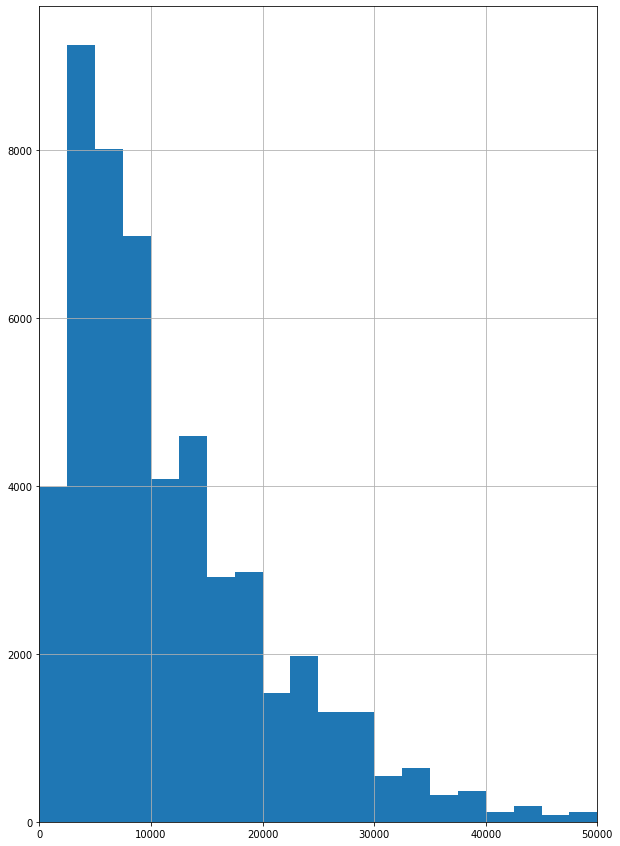

In [39]:
# mempelajari distribusi value kolom price
display(df1['price'].describe(percentiles=[.015, 0.16, .1, .25, .5, .75, .9]).to_frame())

display(df1['price'].hist(bins=150, figsize=(10, 15)))
plt.xlim(xmin=0, xmax=50000)
#terdapat nilai yang tidak wajar pada kolom price yaitu nilai minimum price sebesar 1

In [40]:
# Mencari jumlah kolom price yang memiliki nilai 1
df1['price'].loc[df1['price']== 1].count()

798

In [41]:
print(df1['price'].min())
print(df1['price'].max())

1
375000


,vehicle_age_year
count,51525.000000
mean,8.555672
std,6.057829
min,1.000000
1.5%,1.000000
1.6%,1.000000
10%,2.000000
25%,4.000000
50%,8.000000
75%,12.000000


<AxesSubplot:>

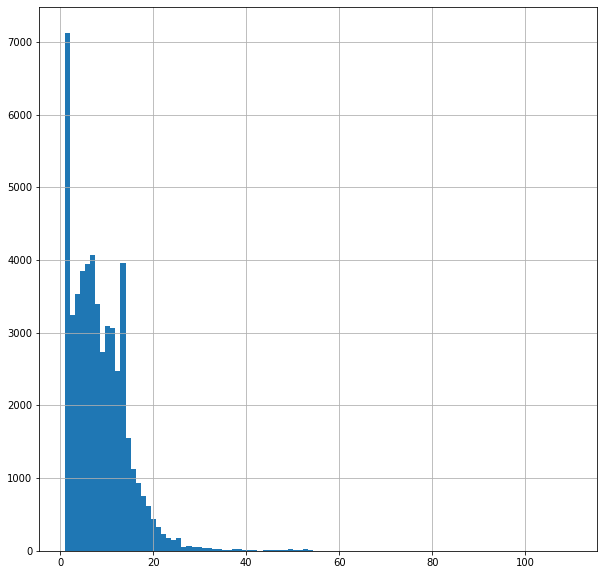

In [42]:
# Mempelajari kolom vehicle_age_year atau umur kendaraan saat iklan ditayangkan
display(df1['vehicle_age_year'].describe(percentiles = [.015, .016, .1, .25, .5, .75, .9, .95,.99]).to_frame())
df1['vehicle_age_year'].hist(bins=100, figsize=(10, 10))


In [43]:
df1['vehicle_age_year'].unique()

array([  7,   6,  16,   2,   4,   3,  11,   1,  10,   5,   8,   9,  15,
        14,  13,  17,  12,  53,  24,  18,  19,  26,  22,  38,  20,  23,
        44,  21,  25,  33,  42,  31,  43,  29,  28,  46,  52,  49,  30,
        40,  54,  39,  50,  27,  32,  55,  37,  56,  34,  45,  41,  51,
        63,  47,  48,  36,  35,  65,  57,  71,  58,  59, 110,  82,  69,
        60,  89])

In [44]:
df1['vehicle_age_year'].max()

110

In [45]:
#Mempelajari parameter Jarak Tempuh
df1['odometer'].describe()



count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

,odometer
count,51525.000000
mean,115199.014508
std,60484.863376
min,0.000000
25%,75668.000000
50%,110908.000000
75%,147821.000000
max,990000.000000


(-49500.0, 200000.0)

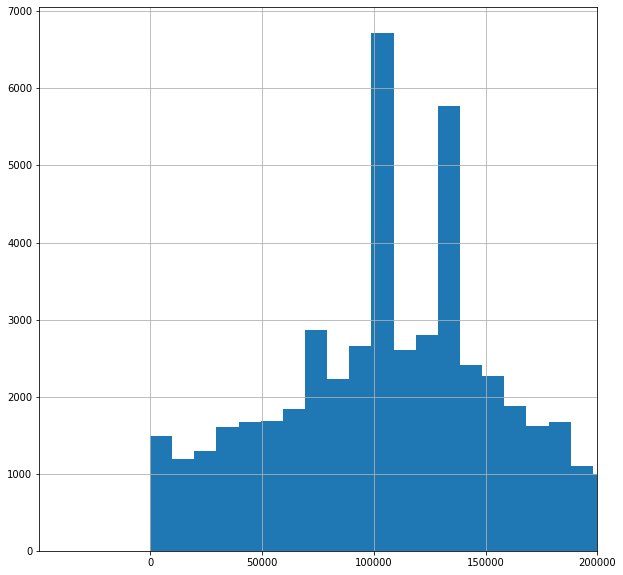

In [46]:
#Mempelajari distribusi value kolom odometer
display(df1['odometer'].describe().to_frame())
df1['odometer'].hist(bins=100, figsize=(10,10))
plt.xlim(xmax= 200000)



<AxesSubplot:>

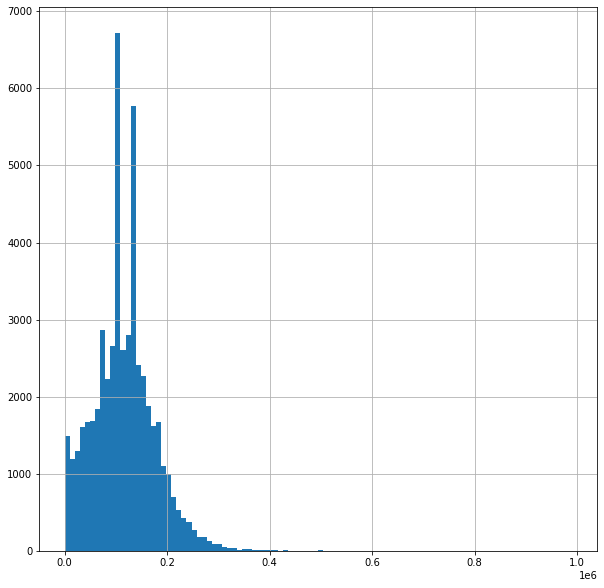

In [47]:
df1['odometer'].hist(bins=100, figsize=(10,10))



In [48]:
df1.pivot_table(index='condition', values='odometer', aggfunc='median')

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


,cylinders
count,51525.000000
mean,6.121067
std,1.657457
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,12.000000


<AxesSubplot:>

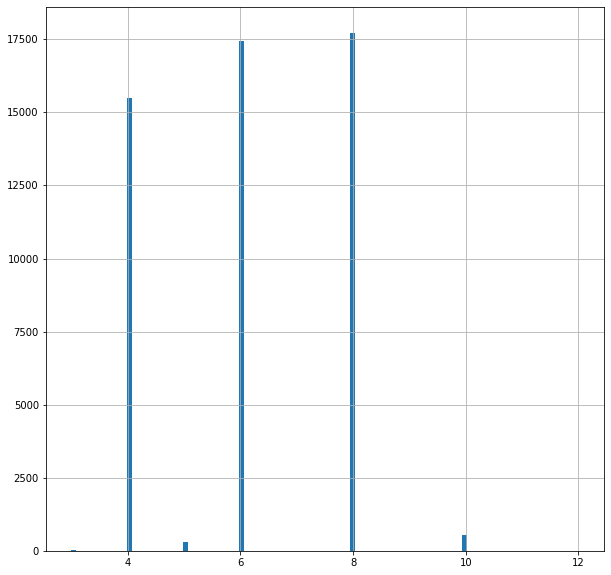

In [49]:
display(df1['cylinders'].describe().to_frame())
df1['cylinders'].hist(bins=100, figsize=(10,10))

,condition
count,51525
unique,6
top,excellent
freq,24773


<AxesSubplot:>

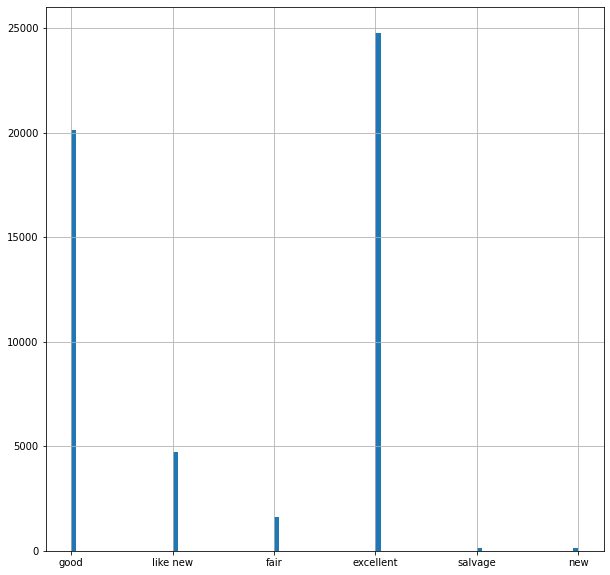

In [50]:
display(df1['condition'].describe().to_frame())
df1['condition'].hist(bins=100, figsize=(10,10))

In [51]:
df1.shape

(51525, 17)

## Mempelajari dan Menangani Outlier

[Dengan hasil di atas, tentukan kolom apa yang mungkin berisi *outlier*, dan buatlah sebuah DataFrame tanpa *outlier* tersebut. Petunjuk: *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.]

In [52]:
# Membuat fungsi untuk outlier
list_of_selected_column = ['price','odometer','vehicle_age_year', ]

def upper_lower_whisker(column_name):
    print(column_name)
    Q1  = df1[column_name].quantile(.25)
    Q3  = df1[column_name].quantile(.75)
    IQR = Q3-Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR

    return lower_whisker, upper_whisker

df_without_outliers = df1.copy()

# Cell code 2
for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    df_without_outliers = df_without_outliers[(df_without_outliers[column] > lower) & (df_without_outliers[column] < upper )]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
price
cleaning outlier on  price  was finished!
start cleaning outlier on  odometer
odometer
cleaning outlier on  odometer  was finished!
start cleaning outlier on  vehicle_age_year
vehicle_age_year
cleaning outlier on  vehicle_age_year  was finished!


In [53]:
#Menentukan kolom apa saja yang akan ditangani outliernya
outlier_column = ['price','vehicle_age_year','odometer']


In [54]:
# Membuat fungsi loop untuk menjalankan fungsi
for column in outlier_column:
    lower_whisker, upper_whisker = upper_lower_whisker(column)
    print('Batas bawah outlier dari',column, lower_whisker)
    print('Batas atas outlier dari',column, upper_whisker)
    print('')

price
Batas bawah outlier dari price -12758.5
Batas atas outlier dari price 34597.5

vehicle_age_year
Batas bawah outlier dari vehicle_age_year -8.0
Batas atas outlier dari vehicle_age_year 24.0

odometer
Batas bawah outlier dari odometer -32561.5
Batas atas outlier dari odometer 256050.5



In [55]:
df_without_outliers.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_in_week,vehicle_age_year,mileage_per_year,condition_id
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,7,20714.3,2
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,7,12672.1,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6,18333.3,4
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,16,11350.8,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,40451.5,3


In [56]:
df_without_outliers.shape

(48149, 17)

## Mempelajari Parameter Inti Tanpa Outlier

[Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.]

In [57]:
#Perubahan pada kolom Price
print(df_without_outliers['price'].describe().to_frame())
print ()
print (df1['price'].describe())

              price
count  48149.000000
mean   11255.842281
std     7829.979364
min        1.000000
25%     5000.000000
50%     8995.000000
75%    15995.000000
max    34595.000000

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


In [58]:
print (df_without_outliers['price'].mean())
print (df1['price'].mean())

11255.842281251947
12132.464919941776


Plot untuk kolom kolom `['price']`

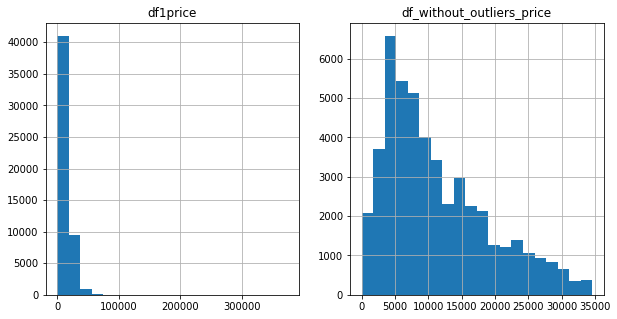

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
df1['price'].hist(bins=20, ax=axes[0])
df_without_outliers['price'].hist(bins=20, ax=axes[1])
axes[0].title.set_text('df1price')
axes[1].title.set_text('df_without_outliers_price')

In [60]:
#display(df1['price'].hist(bins=100, figsize=(10,10)))
#display(df_without_outliers['price'].hist(bins=100, figsize=(10,10)))
#plt.xlim(xmin=0,xmax=40000)


In [61]:
#Perubahan pada kolom Vehicle Age Year
print(df_without_outliers['vehicle_age_year'].describe().to_frame())
print ()
print (df1['vehicle_age_year'].describe())

       vehicle_age_year
count      48149.000000
mean           8.209018
std            4.931925
min            1.000000
25%            4.000000
50%            7.000000
75%           11.000000
max           23.000000

count    51525.000000
mean         8.555672
std          6.057829
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age_year, dtype: float64


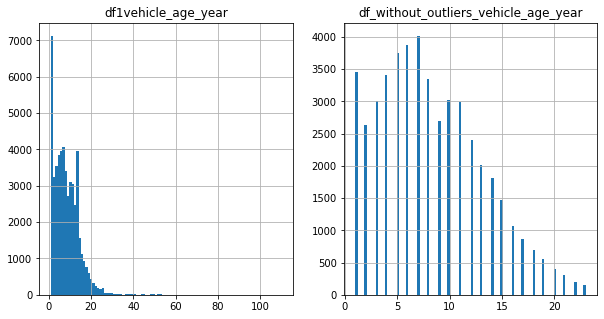

In [62]:
#display(df1['vehicle_age_year'].hist(bins=100, figsize=(10,10)))
#display(df_without_outliers['vehicle_age_year'].hist(bins=100, figsize=(10,10)))
#plt.ylim(ymax=500)

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
df1['vehicle_age_year'].hist(bins=100, ax=axes[0])
df_without_outliers['vehicle_age_year'].hist(bins=100, ax=axes[1])
axes[0].title.set_text('df1vehicle_age_year')
axes[1].title.set_text('df_without_outliers_vehicle_age_year')

In [63]:
#Perubahan pada kolom Odometer
print(df_without_outliers['odometer'].describe().to_frame())
print ()
print (df1['odometer'].describe())

            odometer
count   48149.000000
mean   113626.888232
std     53103.585138
min         0.000000
25%     78600.000000
50%    111833.000000
75%    146000.000000
max    256000.000000

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64


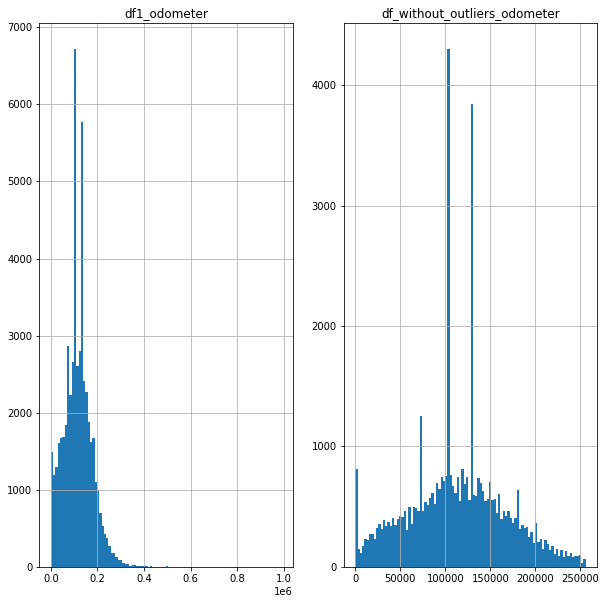

In [64]:
#display(df1['odometer'].hist(bins=100, figsize=(10,10)))
#display(df_without_outliers['odometer'].hist(bins=100, figsize=(10,10)))
#plt.ylim(ymax=2000)
fig, axes = plt.subplots(ncols=2, figsize=(10,10))
df1['odometer'].hist(bins=100, ax=axes[0])
df_without_outliers['odometer'].hist(bins=100, ax=axes[1])
axes[0].title.set_text('df1_odometer')
axes[1].title.set_text('df_without_outliers_odometer')

## Masa Berlaku Iklan 
[Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.]

In [65]:
print('Mean tanpa outlier', df_without_outliers['days_listed'].mean())
print('Median tanpa outlier', df_without_outliers['days_listed'].median())

Mean tanpa outlier 39.538827389976944
Median tanpa outlier 33.0


<AxesSubplot:>

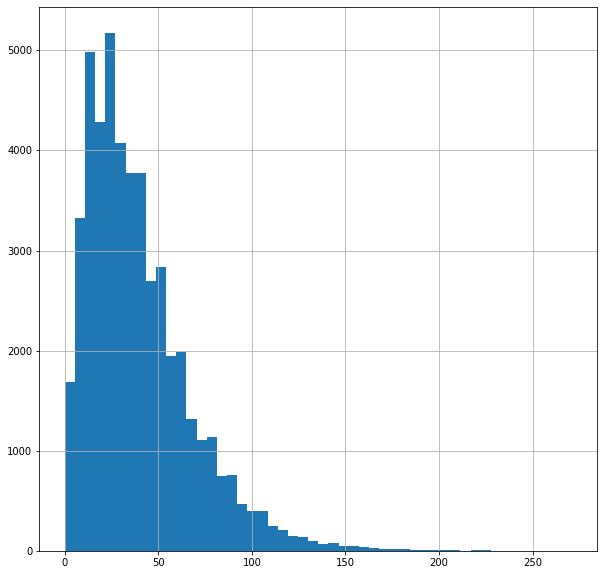

In [66]:
df_without_outliers['days_listed'].hist(bins=50, figsize=(10,10))

(-6.449999999999999, 150.0)

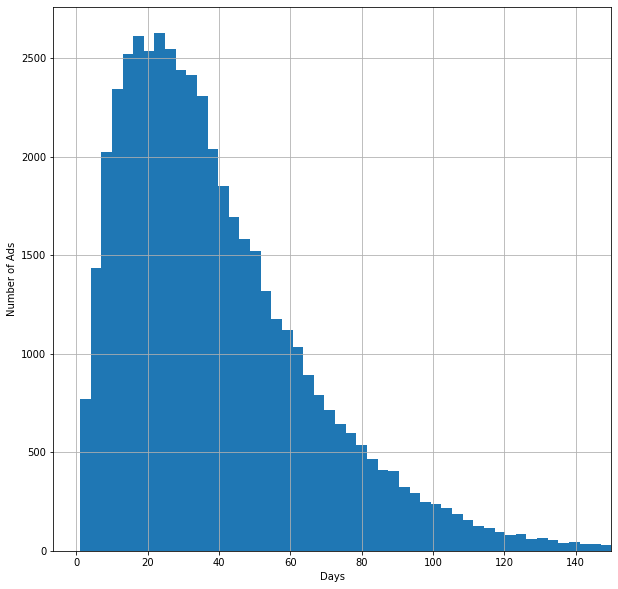

In [67]:
df_dayslisted_filter = df_without_outliers.query('1 <= days_listed <= 150') #mempersempit range lama hari
df_dayslisted_filter['days_listed'].hist(bins=50, figsize=(10,10))
plt.xlabel('Days')
plt.ylabel('Number of Ads')
plt.xlim(xmax=150)

In [68]:
df_without_outliers['days_listed'].max()

271

In [69]:
df_finish = df_without_outliers

## Harga Rata-Rata Setiap Jenis Kendaraan

[Lakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buatlah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.]

**Kesimpulan Sementara**
Mobil yang paling sering diiklankan adalah mobil jenis SUV dan sedan

In [70]:
col_parameter = ['vehicle_age_year', 'condition_id', 'cylinders']

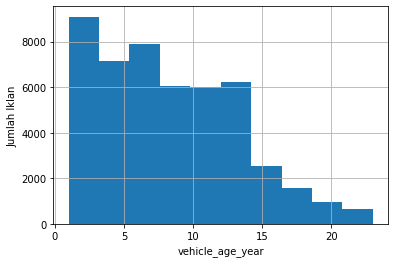

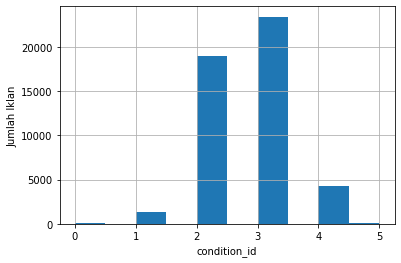

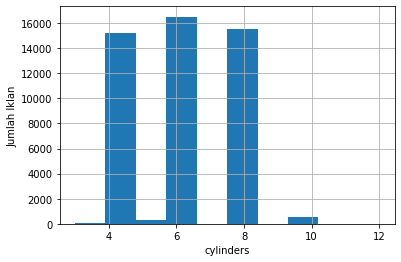

In [71]:

#Loop through the column names
for column in col_parameter:
    df_finish[column].hist()
    plt.xlabel(column)
    plt.ylabel('Jumlah Iklan')
    plt.show()

In [72]:
df_finish.groupby('type')['price'].mean().reset_index().sort_values('price', ascending=False)

,type,price
1,bus,18107.428571
10,truck,15189.795759
8,pickup,15127.550000
6,offroad,14344.049451
3,coupe,13548.858706
2,convertible,13046.598240
7,other,10542.137339
0,SUV,10475.172960
12,wagon,8996.340667
11,van,8889.480969


**Kesimpulan Sementara**
- Harga kendaraan termahal pertama adalah kendaraan jenis Bus berada di posisi pertama pada iklan
- Harga kendaraan termahal kedua adalah kendaraan jenis Truck berada di posisi kedua pada iklan

In [73]:
col_price_type_parameter = ['type','price','condition_id']

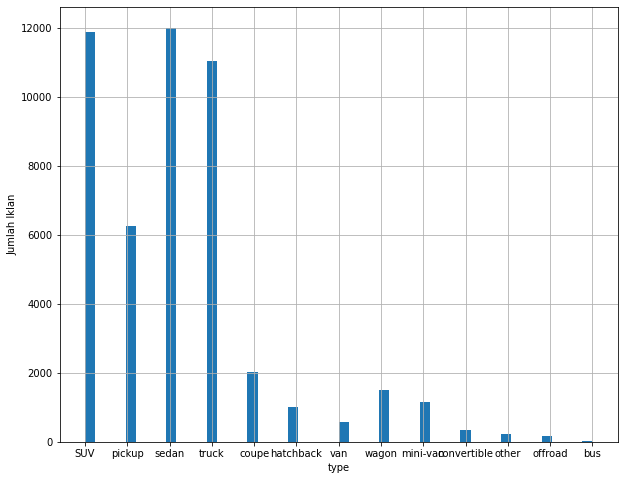

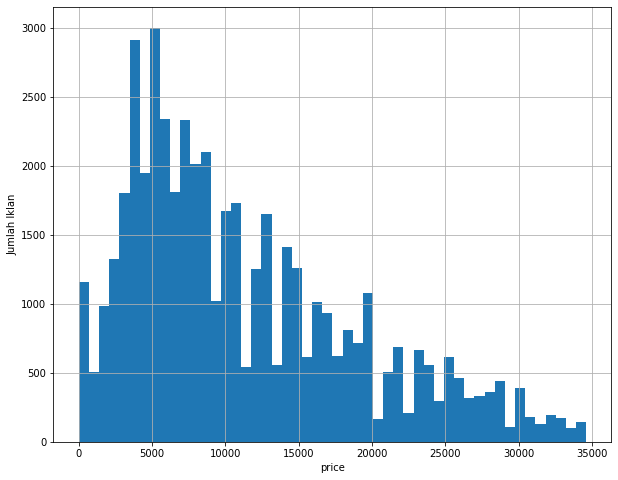

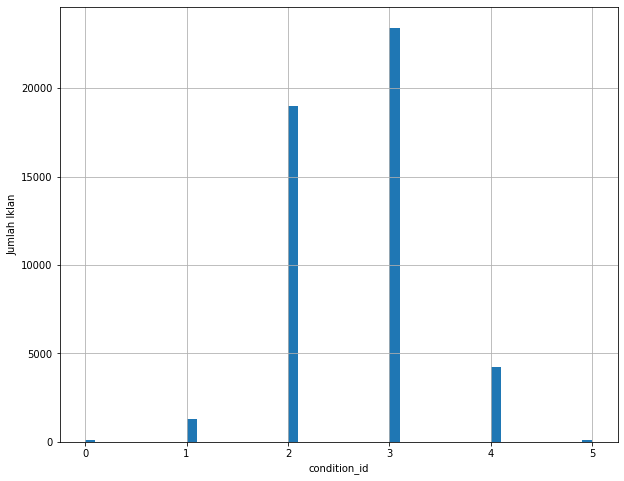

In [74]:
for column in col_price_type_parameter:
    df_finish[column].hist(bins=50, figsize=(10,8))
    plt.xlabel(column)
    plt.ylabel('Jumlah Iklan')
    plt.show()

## Faktor Harga

[Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.]

[Manfaatkan matriks korelasi dan plot korelasi]

In [75]:
df_sedan = df_finish.loc[df_finish['type'] == 'sedan']
df_sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_in_week,vehicle_age_year,mileage_per_year,condition_id
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6,18333.3,4
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,40451.5,3
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,4,14488.5,3
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,3,26404.0,3
11,8990,2012,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,Thursday,7,15877.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,Wednesday,5,17627.2,4
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,Wednesday,16,11343.8,0
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,Thursday,9,14222.2,3
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,Monday,5,27914.6,2


In [76]:
# Menentukan parameter yang ingin dilihat korelasinya dengan harga
for col in ['vehicle_age_year','condition','odometer','transmission','paint_color']:
    print(df_sedan[col].value_counts())

6     1320
5     1178
4      975
1      932
7      923
8      817
9      805
3      751
2      722
10     690
11     688
12     562
13     417
14     316
15     270
16     197
17     148
18     104
19      74
20      48
21      27
22      20
23      15
Name: vehicle_age_year, dtype: int64
excellent    6094
good         4248
like new     1308
fair          261
new            47
salvage        41
Name: condition, dtype: int64
104230.0    948
129000.0    705
72982.5     219
130000.0     61
0.0          60
           ... 
30726.0       1
140200.0      1
38900.0       1
138308.0      1
77800.0       1
Name: odometer, Length: 4871, dtype: int64
automatic    11292
manual         575
other          132
Name: transmission, dtype: int64
unknown    2160
silver     2032
black      1757
grey       1609
white      1486
blue       1219
red         934
custom      296
brown       251
green       202
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64


**Kesimpulan dari parameter kolom**
- Mobil yang terjual paling banyak berusia 6 tahun
- Memiliki kondisi excellent
- Memiliki odometer sebesar 104230
- Memiliki transmisi matic
- Memiliki warna kategori unknown, namun untuk terbanyak ke 2 berwarna silver

<AxesSubplot:xlabel='price', ylabel='vehicle_age_year'>

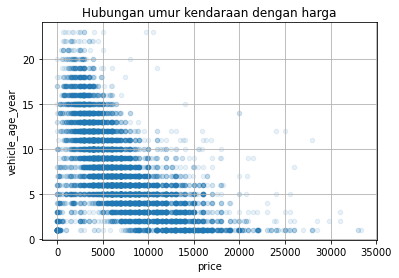

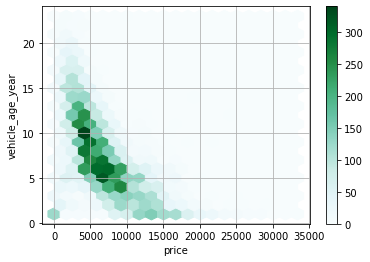

In [77]:
df_sedan.plot(x='price', y='vehicle_age_year', kind='scatter', grid=True, title='Hubungan umur kendaraan dengan harga', alpha=0.1)
df_sedan.plot(x='price', y='vehicle_age_year', kind='hexbin', gridsize=20, sharex=False, grid=True) 

**Korelasi Antara Umur kendaraan**
Berdasarkan grafik diatas dapat kita tarik kesimpulan bahwa perbandingan antara umur kendaraan dengan harga tidak searah.
semakin tua umur kendaraan semakin murah harganya

<AxesSubplot:xlabel='price', ylabel='condition_id'>

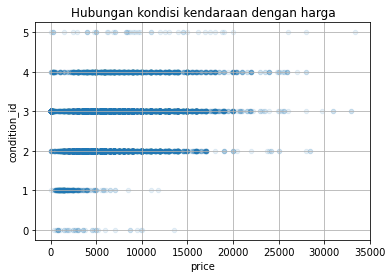

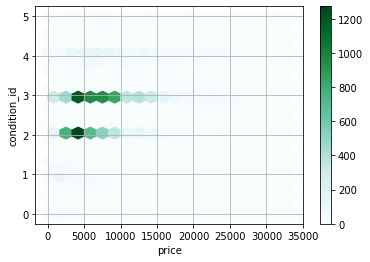

In [78]:
df_sedan.plot(x='price', y='condition_id', kind='scatter', grid=True, title='Hubungan kondisi kendaraan dengan harga',alpha=0.1)
df_sedan.plot(x='price', y='condition_id', kind='hexbin', gridsize=20, sharex=False, grid=True) 

**Kesimpulan korelasi antara harga dengan kondisi**
- Berdasarkan grafik dapat ditarik kesimpulan bahwa semakin baik kondisi semakin tinggi harga jualnya
- Berdasarkan grafik diatas mobil yang paling diminati berada pada posisi kondisi excellent dan good

<AxesSubplot:xlabel='price', ylabel='odometer'>

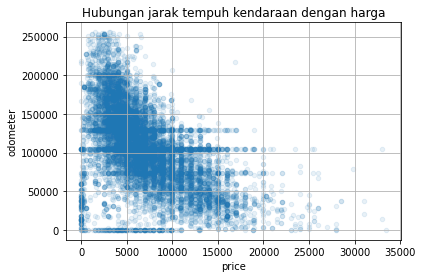

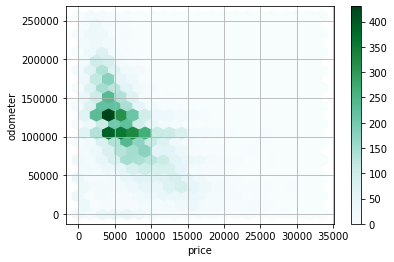

In [79]:
df_sedan.plot(x='price', y='odometer', kind='scatter', grid=True, title='Hubungan jarak tempuh kendaraan dengan harga',alpha=0.1)
df_sedan.plot(x='price', y='odometer', kind='hexbin', gridsize=20, sharex=False, grid=True) 

Grafik diatas menunjukkan korelasi tingkat odometer dengan penjualan berdasarkan harga
dapat ditarik kesimpulan bahwa semakin tinggi odometer semakin rendah harga, sementara untuk mobil terjual paling banyak
berkisar pada odometer 50 ribu sampai dengan 150 ribu

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

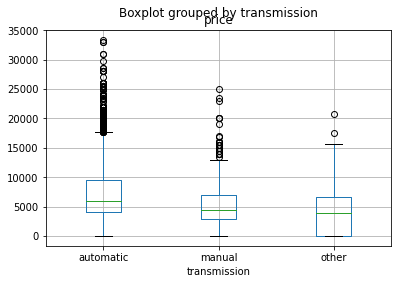

In [80]:
df_sedan.boxplot(column='price', by='transmission')

Berdasarkan boxplot transmission mobil berjenis transmisi otomatis memiliki harga yang lebih tinggi dibandingkan manual

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

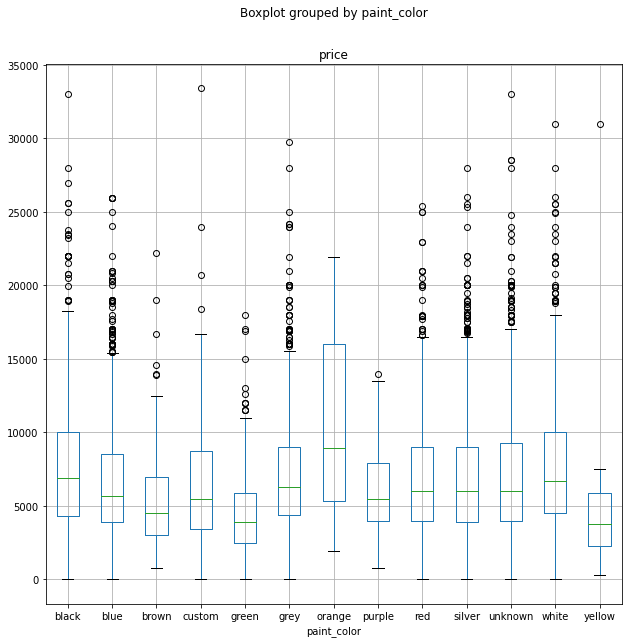

In [81]:
df_sedan.boxplot(column = 'price', by='paint_color', figsize=(10,10))

Berdasarkan boxplot diatas mobil berwarna orange memang memiliki harga yang lebih tinggi sedikit dibandingkan warna lain,
tetapi tidak ada korelasi yang jelas dalam hubungan antara warna dengan harga, karena pada boxplot setiap warna hampir sejajar 
dalam segi harga

In [82]:
print('Korelasi antara harga sedan dengan umur:', df_sedan['price'].corr(df_sedan['vehicle_age_year']))
print('Korelasi antara harga sedan dengan kondisi:',df_sedan['price'].corr(df_sedan['condition_id']))
print('Korelasi antara harga sedan dengan odometer:',df_sedan['price'].corr(df_sedan['odometer']))

Korelasi antara harga sedan dengan umur: -0.612255832474285
Korelasi antara harga sedan dengan kondisi: 0.2922422112773058
Korelasi antara harga sedan dengan odometer: -0.5188724446425386


Berdasarkan hasil korelasi diatas hubungan antara harga sedan dan kondisi memiliki korelasi positif
hubungan antara harga sedan dengan umur berkorelasi negatif
hubungan antara harga sedan dengan odometer berkorelasi negatif

In [83]:
df_suv = df_finish.loc[df_finish['type']=='SUV']

In [84]:
for col in ['vehicle_age_year','condition','odometer','transmission','paint_color']:
    print(df_suv[col].value_counts())

7     980
11    923
6     895
10    876
8     845
5     822
1     793
9     783
4     777
3     670
12    571
2     529
14    478
13    464
15    423
16    298
17    198
18    161
19    132
20    101
21     65
22     50
23     30
Name: vehicle_age_year, dtype: int64
excellent    6303
good         4163
like new     1088
fair          276
salvage        17
new            17
Name: condition, dtype: int64
104230.0    988
129000.0    663
72982.5     165
181613.0     51
185000.0     48
           ... 
237212.0      1
73684.0       1
30613.0       1
84933.0       1
48650.0       1
Name: odometer, Length: 4951, dtype: int64
automatic    11250
manual         456
other          158
Name: transmission, dtype: int64
unknown    2137
black      2085
white      1867
silver     1530
grey       1145
blue       1009
red         869
green       410
brown       350
custom      298
orange       81
yellow       45
purple       38
Name: paint_color, dtype: int64


In [85]:
df_suv['paint_color'].value_counts(normalize=True)

unknown    0.180125
black      0.175742
white      0.157367
silver     0.128962
grey       0.096510
blue       0.085047
red        0.073247
green      0.034558
brown      0.029501
custom     0.025118
orange     0.006827
yellow     0.003793
purple     0.003203
Name: paint_color, dtype: float64

Berdasarkan hasil value counts pada kolom vehicle_age_year , condition, odometer, transmission, dan paint_color
didapatkan kesimpulan bahwa:
    - Umur kendaraan SUV yang paling banyak terjual berusia 7 tahun
    - Kondisi kendaraan SUV yang paling banyak terjual memiliki kondisi excellent lalu diikuti good
    - Kondisi odometer kendaraan SUV yang paling banyak terjual memiliki odometer jarak tempuh 104230
    - Kondisi transmission kendaraan SUV yang paling banyak adalah automatic sebanyak 8577 kendaraan
    - Jenis warna kendaraan SUV yang paling banyak terjual adalah warna black lalu diikuti oleh unknown dan white
    - Karakteristik warna pada suv yang terjual hampir mirip dengan sedan, namun pada suv warna hitam lebih banyak terjual

<AxesSubplot:xlabel='price', ylabel='vehicle_age_year'>

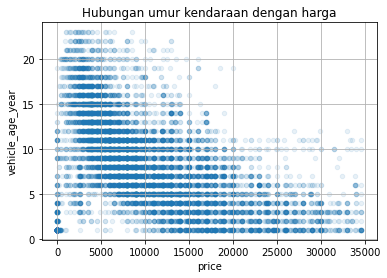

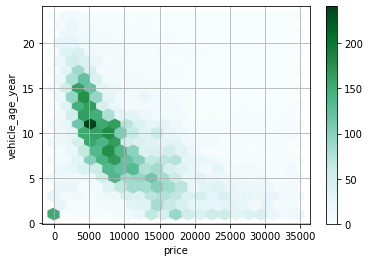

In [86]:
df_suv.plot(x='price', y='vehicle_age_year', kind='scatter', grid=True, title='Hubungan umur kendaraan dengan harga',alpha=0.1)
df_suv.plot(x='price', y='vehicle_age_year', kind='hexbin', gridsize=20, sharex=False, grid=True) 

Berdasarkan grafik korelasi antara umur kendaraan SUV dan harga dapat disimpulkan bahwa korelasi antar umur kendaraan SUV 
dan price bernilai negatif, semakin tua umur kendaraan SUV maka semakin murah harganya

<AxesSubplot:xlabel='price', ylabel='condition_id'>

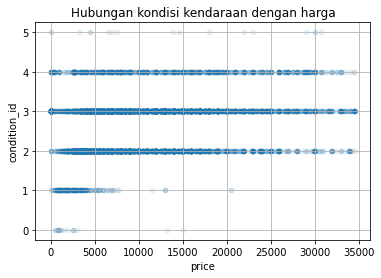

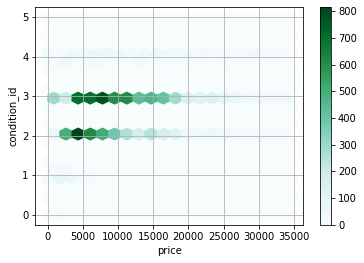

In [87]:
df_suv.plot(x='price', y='condition_id', kind='scatter', grid=True, title='Hubungan kondisi kendaraan dengan harga',alpha=0.1)
df_suv.plot(x='price', y='condition_id', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [88]:
df_suv['price'].corr(df_suv['condition_id'])

0.25981782587251934

Berdasarkan grafik diatas dapat dilihat korelasi antara condition dengan price memiliki korelasi positif, 
pada umum nya pada grafik mayoritas data menunjukan semakin baik kondisi kendaraan maka semakin tinggi harganya, namun ada
juga kendaraan yang memiliki kondisi 1 atau salvage memiliki harga diatas 120000 dollar, sehingga dapat disimpulkan tidak ada
korelasi yang jelas antara kondisi dengan harga, namun jenis kendaraan suv yang paling banyak terjual memiliki kondisi excellent 
atau good

<AxesSubplot:xlabel='price', ylabel='odometer'>

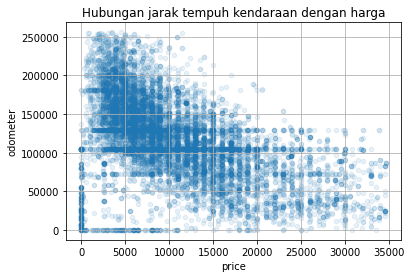

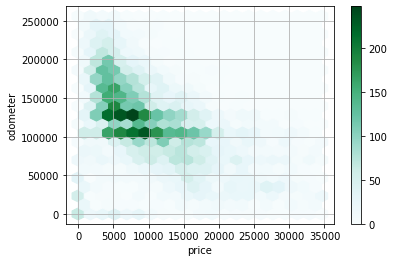

In [89]:
df_suv.plot(x='price', y='odometer', kind='scatter', grid=True, title='Hubungan jarak tempuh kendaraan dengan harga',alpha=0.1)
df_suv.plot(x='price', y='odometer', kind='hexbin', gridsize=20, sharex=False, grid=True) 

Berdasarkan grafik diatas dapat disimpulkan bahwa semakin tinggi odometer maka semakin rendah harga kendaraan jenis SUV
sehingga korelasi antara harga suv dengan kondisi memiliki korelasi negatif

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

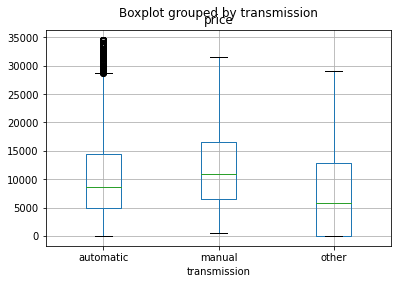

In [90]:
df_suv.boxplot(column='price', by='transmission')

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

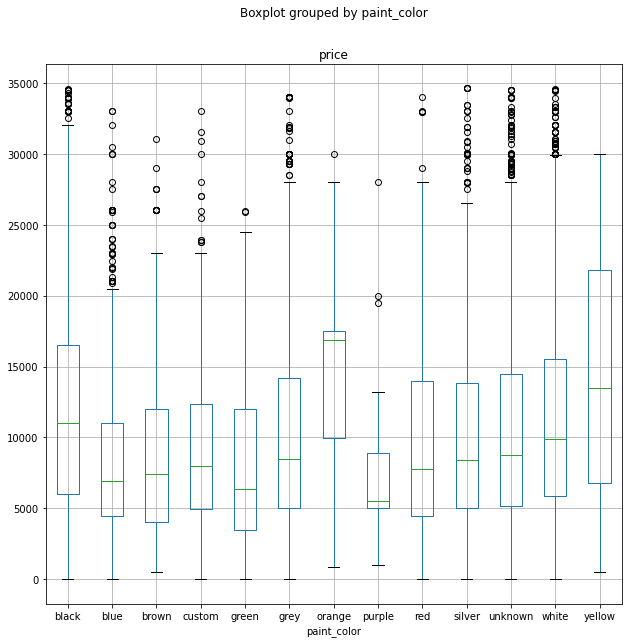

In [91]:
df_suv.boxplot(column='price', by='paint_color', figsize=(10,10))

**Kesimpulan kendaraan SUV**
- Berdasarkan boxplot dapat dilihat tidak ada korelasi yang jelas antara warna dan jenis transmisi pada harga, pada boxplot
  transmission baik matic atau manual memiliki harga yang relatif sama, pada warna orange dan yellow juga memiliki harga relatif
  sama sehingga tidak ditemukan korelasi yang jelas

In [92]:
df_suv['paint_color'].value_counts()

unknown    2137
black      2085
white      1867
silver     1530
grey       1145
blue       1009
red         869
green       410
brown       350
custom      298
orange       81
yellow       45
purple       38
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

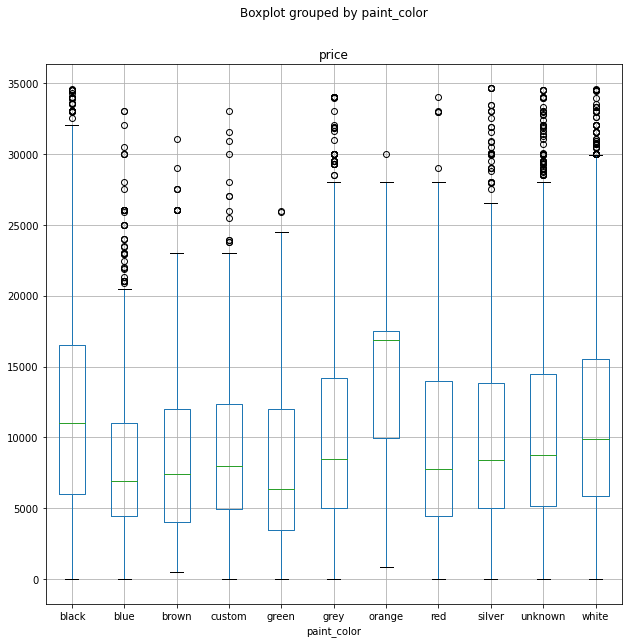

In [93]:
df_suv_valid_color = df_suv[~df_suv['paint_color'].isin(['yellow', 'purple'])]
df_suv_valid_color.boxplot(column='price', by='paint_color', figsize=(10,10))

In [94]:
print(df_suv['price'].corr(df_suv['vehicle_age_year']))
print(df_suv['price'].corr(df_suv['condition_id']))
print(df_suv['price'].corr(df_suv['odometer']))

-0.575563214645434
0.25981782587251934
-0.4858788164903


Berdasarkan hasil korelasi diatas korelasi positif ada pada korelasi antara harga dengan kondisi, sisanya memiliki korelasi negatif

## Kesimpulan Umum
[Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]

In [95]:
df_finish.shape

(48149, 17)

**Kesimpulan Keseluruhan**
1. Pada tahap Pra Pemrosesan terdapat beberapa kolom yang memiliki nilai yang hilang yaitu:
    - is_4wd
    - paint_color
    - odometer
    - cylinders
    - model_year
2. Nilai yang hilang pada kolom is_4wd diisi dengan nilai 0 atau pada tipe data boolean bernilai false atau bukan 4wd
3. Pada kolom paint_color nilai NaN diisi dengan string 'unknown'
4. Pada kolom odometer nilai NaN diisi dengan median yang memiliki kondisi yang sama
5. Pada kolom cylinders nilai NaN diisi dengan median jenis cylinder yang memiliki nilai model_year yang serupa
6. Pada kolom model_year nilai NaN diisi dengan median jenis model_year yang memiliki model yang sama
7. Pada tahap Hasil Analisis Eksplorasi Data parameter yang digunakan adalah price, car_age_year, odometer, cylinders, condition
8. Pada awalnya data dengan outlier terdapat sebanyak 51525, namun setelah membersihkan outlier 48149
9. Pada jenis kendaraan suv ataupun sedan sama sama memiliki korelasi positif antara harga dengan kondisi, semakin baik kondisi
   semakin tinggi juga harga kendaraan
10. Pada jenis kendaraan sedan mobil matic memiliki harga yang tinggi dibandingkan manual, namun pada suv tidak ada perbedaan.
11. Pada kolom odometer, baik jenis kendaraan sedan ataupun suv memiliki korelasi negatif terhadap harga, karena semakin tinggi 
    odometernya, semakin murah harga kendaraan tersebut
12. Tidak ada korelasi yang jelas antara price dan paint_color pada jenis kendaraan suv maupun sedan, semua warna memiliki harga
    yang relatif sama
13. Rentang waktu maksimal iklan ditayangkan pada kolom day_listed adalah 271 hari
    